In [3]:
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt
# 简洁实现
num_epochs, lr, batch_size = 10, 0.5, 256
dropout1, dropout2 = 0.2, 0.5
loss = nn.CrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

net = nn.Sequential(nn.Flatten(),nn.Linear(784,256),nn.ReLU(),
                   nn.Dropout(dropout1),nn.Linear(256,256),nn.ReLU(),
                   nn.Dropout(dropout2),nn.Linear(256,10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight,std=0.01)
    
net.apply(init_weights)

trainer = torch.optim.SGD(net.parameters(),lr=lr)


In [10]:
# 评估模型在给定数据集上的损失
def evaluate_loss(net, data_iter, loss):
    """评估给定数据集上模型的损失"""
    loss_sum = 0
    num_samples = 0
    for X, y in data_iter: # 从迭代器中拿出对应特征和标签
        out = net(X)
        # y = y.reshape(out.shape) # 将真实标签改为网络输出标签的形式，统一形式
        l = loss(out, y) # 计算网络输出的预测值与真实值之间的损失差值
        loss_sum += l.sum()
        num_samples += y.numel()
    return loss_sum / num_samples # 返回数据集的平均损失

# 定义训练函数
def train(net, train_iter, test_iter, loss, num_epochs, trainer):
    loss_train_list = []      # 新增：用于保存loss
    loss_test_list = []      # 新增：用于保存loss
    epoch_list = []     # 新增：用于保存epoch编号
    
    for epoch in range(num_epochs):
        for X, y in train_iter:  # 从DataLoader里面一次一次把所有数据拿出来
            l = loss(net(X),y) # net(X) 为计算出来的线性回归的预测值
            trainer.zero_grad() # 梯度清零
            l.backward()
            trainer.step()  # SGD优化器优化模型
        
        loss_train = evaluate_loss(net, train_iter, loss)
        loss_test = evaluate_loss(net, test_iter, loss)
        print(f'epoch{epoch+1},loss{loss_train:f}')
        loss_train_list.append(loss_train.item())         # 保存loss
        loss_test_list.append(loss_test.item())         # 保存loss
        epoch_list.append(epoch + 1)       # 保存epoch编号

    # print('weight',net[0].weight.data.numpy()) # 训练完后打印，打印最终学到的weight值  
    # 新增：画图
    plt.plot(epoch_list, loss_train_list, loss_test_list, marker='o')
    plt.xlabel('epoch')
    plt.ylabel('loss_train')
    plt.ylabel('loss_test')
    plt.title('Loss Every 20 Epochs')
    plt.show()

epoch1,loss0.001205
epoch2,loss0.001178
epoch3,loss0.001094
epoch4,loss0.001064
epoch5,loss0.001057
epoch6,loss0.001388
epoch7,loss0.001063
epoch8,loss0.001060
epoch9,loss0.001022
epoch10,loss0.001100


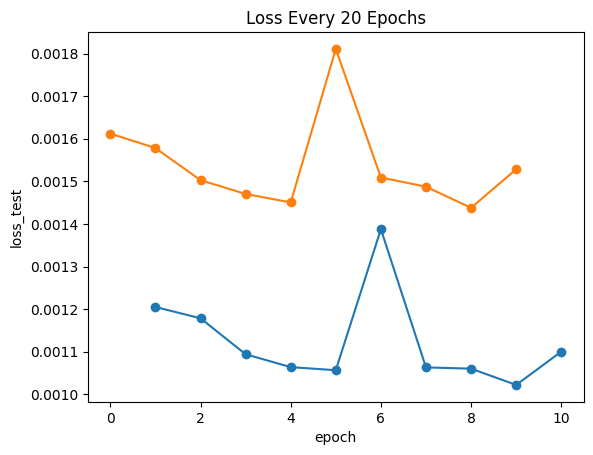

In [11]:
train(net,train_iter, test_iter, loss, num_epochs, trainer)